# To be shared for the DH presentation

In [273]:
import os
import numpy as np
import pandas as pd
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import dataframe_visualizer
from src import query_engines

q = query_engines.QueryEngines()

# Queries

In [274]:
QUERY_NAME = 'dh_presentation.sql' # With sql
START_DATE = "'2024-12-01'"
END_DATE = "'2025-02-01'"
STORE_ADDRESSES_ID = "481372, 481369, 543200, 481365"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'store_addresses_id', 'value': str(STORE_ADDRESSES_ID)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=QUERY_NAME
)

df  = q.query_run_starburst()
df

,p_creation_date,order_id,external_id,strategy,alternativeproducts,customer_id,store_address_id,store_name,order_subvertical3,variant,product_name,bought_product_id_is_pna_replacement,bought_product_id_is_pna_partial_removal,bought_product_id_is_pna_total_removal,bought_product_id_is_wm_feedback,bought_product_id_is_pna
0,2025-01-12,101140428090,603945,REPLACE_WITH_BEST_MATCH,"['588727', '9155', '9148', '9150']",91093,481369,Eataly,Groceries,variant 1,La Panetteria di Eataly Panedì Bio 1Kg,False,False,False,False,False
1,2025-01-06,101125496942,573975,REMOVE,[None],310391,481369,Eataly,Groceries,variant 1,Villani Salumi Listarelle di Guanciale 0.12Kg,False,False,False,False,False
2,2024-12-22,101093836688,16795,REMOVE,[None],1117235,481372,Eataly,Groceries,variant 1,Guerrini Riso Carnaroli 1Kg,False,False,False,False,False
3,2024-12-24,101098179953,244528,REMOVE,[None],168816258,481369,Eataly,Groceries,variant 1,L'Ortofrutta di Eataly Patate 1 KG,False,False,True,False,True
4,2025-01-05,101122536506,64705,REMOVE,[None],58897298,481369,Eataly,Groceries,Control Group,Bredy Ugo Fontina DOP 0.3Kg,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15408,2024-12-28,101105680844,13657,REMOVE,[None],15918405,481365,Eataly,Groceries,variant 1,La Panetteria di Eataly Focaccia con Cipolle 0...,False,False,False,False,False
15409,2025-01-09,101131563624,380094,REPLACE_WITH_BEST_MATCH,"['106511', '7945', '7900', '15436']",6202617,481365,Eataly,Groceries,variant 1,L'Ortofrutta di Eataly Avocado 0.2Kg,False,False,False,False,False
15410,2024-12-14,101073875929,9157,REPLACE_WITH_BEST_MATCH,"['550549', '20559', '127356', '75613']",15918405,481365,Eataly,Groceries,variant 2,La Panetteria di Eataly Baguette Biologica 0.35Kg,False,False,False,False,False
15411,2025-01-04,101120888697,57288,REMOVE,[None],127379,481369,Eataly,Groceries,variant 1,La Macelleria di Eataly Petto di pollo a fette...,False,False,False,False,False


In [275]:
# If Variant is none, then fill with 'Not Specified'
df['variant'] = df['variant'].fillna('Not Specified')

In [276]:
# Null distribution
df.isnull().sum()

p_creation_date                             0
order_id                                    0
external_id                                 0
strategy                                    0
alternativeproducts                         0
customer_id                                 0
store_address_id                            0
store_name                                  0
order_subvertical3                          0
variant                                     0
product_name                                0
bought_product_id_is_pna_replacement        0
bought_product_id_is_pna_partial_removal    0
bought_product_id_is_pna_total_removal      0
bought_product_id_is_wm_feedback            0
bought_product_id_is_pna                    0
dtype: int64

In [277]:
# Number of orders
df['order_id'].nunique()

2684

# Health Check on Data - Order distribution

In [51]:
df_grouped = df.groupby(['p_creation_date', 'variant']).agg({'order_id':'nunique'}).reset_index()
df_grouped = df_grouped.pivot(index='p_creation_date', columns='variant', values='order_id').reset_index()
df_grouped = df_grouped.fillna(0)
df_grouped.sort_values(by='p_creation_date', inplace=True)
df_grouped

variant,p_creation_date,Control Group,Not Specified,variant 1,variant 2
0,2024-12-13,0.0,9.0,1.0,71.0
1,2024-12-14,0.0,18.0,0.0,108.0
2,2024-12-15,0.0,22.0,0.0,108.0
3,2024-12-16,0.0,10.0,1.0,34.0
4,2024-12-17,24.0,13.0,34.0,1.0
5,2024-12-18,34.0,13.0,45.0,2.0
6,2024-12-19,42.0,20.0,55.0,1.0
7,2024-12-20,56.0,9.0,52.0,0.0
8,2024-12-21,51.0,11.0,55.0,1.0
9,2024-12-22,65.0,10.0,56.0,1.0


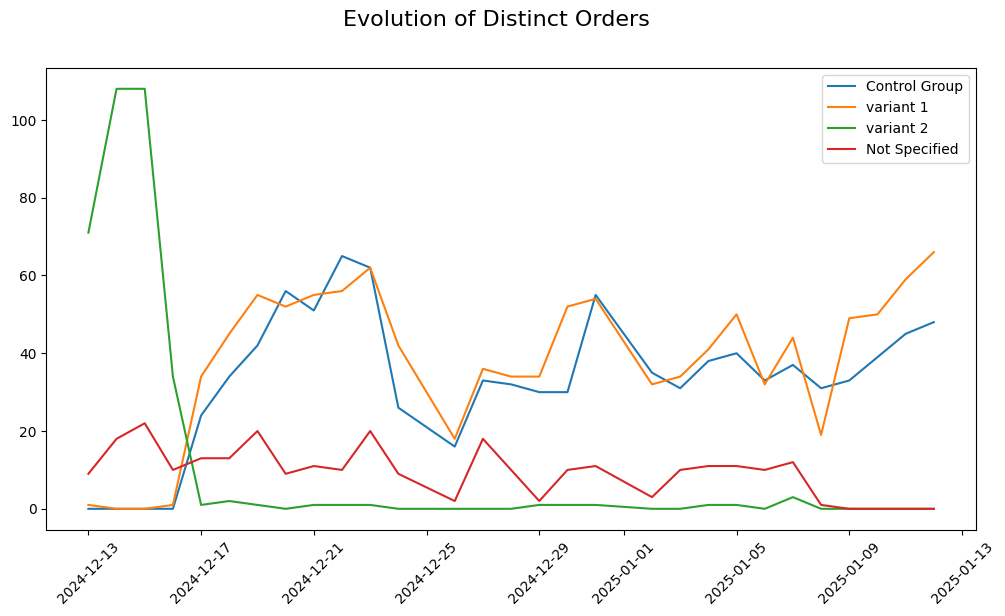

In [52]:
# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df_grouped)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['Control Group', 'variant 1', 'variant 2','Not Specified'],
        'colors': ['blue', 'orange', 'green', 'red'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'Evolution of Distinct Orders' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Extra query: Check on exposures

In [111]:
QUERY_NAME = 'check_exposures.sql' # With sql
START_DATE = "'2024-10-01'"
END_DATE = "'2025-02-01'"
STORE_ADDRESSES_ID = "481372, 481369, 543200, 481365"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'store_addresses_id', 'value': str(STORE_ADDRESSES_ID)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=QUERY_NAME
    
)

check_exposures  = q.query_run_starburst()
check_exposures

,p_creation_date,variant,n_customers
0,2024-12-18,variant 1,25025
1,2025-01-07,variant 1,16224
2,2024-11-27,variant 1,63
3,2024-12-23,Control Group,21103
4,2024-12-07,Control Group,101
...,...,...,...
144,2024-11-22,Control Group,36
145,2024-12-03,Control Group,75
146,2024-12-02,variant 1,78
147,2024-12-29,Control Group,23863


In [112]:
check_exposures = check_exposures.pivot(index='p_creation_date', columns='variant', values='n_customers').reset_index()
check_exposures.fillna(0, inplace=True)
check_exposures.sort_values('p_creation_date', inplace=True)
check_exposures['total_customers'] = check_exposures['Control Group'] + check_exposures['variant 1'] + check_exposures['variant 2']
check_exposures

variant,p_creation_date,Control Group,variant 1,variant 2,total_customers
0,2024-10-31,0.0,0.0,1.0,1.0
1,2024-11-01,0.0,0.0,3.0,3.0
2,2024-11-02,0.0,0.0,1.0,1.0
3,2024-11-03,0.0,0.0,4.0,4.0
4,2024-11-05,0.0,0.0,1.0,1.0
...,...,...,...,...,...
67,2025-01-08,24172.0,23827.0,0.0,47999.0
68,2025-01-09,26926.0,27006.0,0.0,53932.0
69,2025-01-10,33420.0,33341.0,0.0,66761.0
70,2025-01-11,33057.0,32938.0,0.0,65995.0


In [113]:
# Tramsform p_creation_date into datetiem
check_exposures['p_creation_date'] = pd.to_datetime(check_exposures['p_creation_date'])

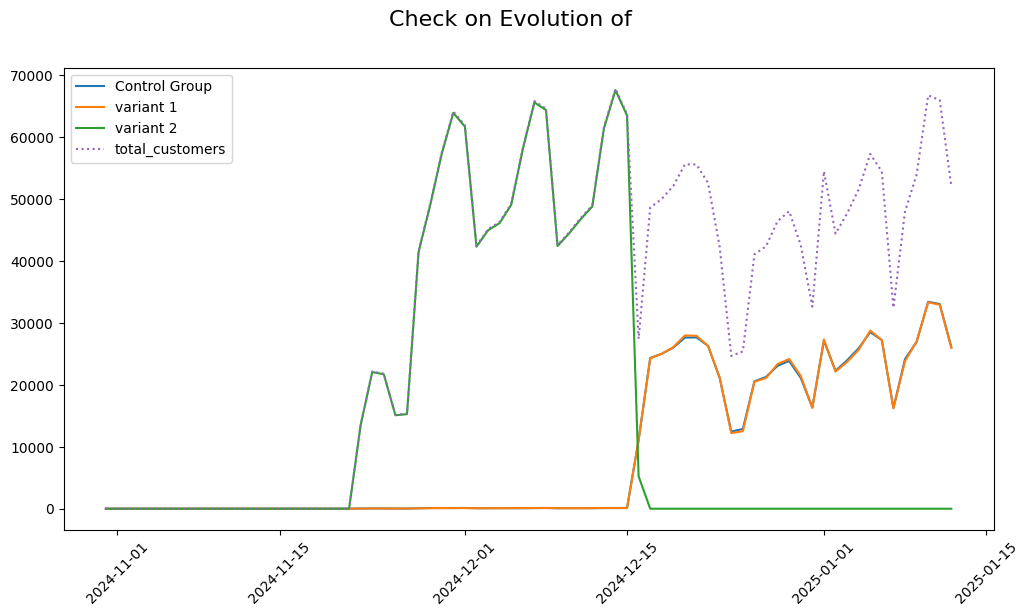

In [115]:
# =====================================
# Plots
# =====================================

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(check_exposures)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['Control Group', 'variant 1', 'variant 2', 'total_customers'],
        'colors': ['blue', 'orange', 'green', 'purple'], # default None
        'styles': ['-', '-', '-', ':'], # default None    
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'Check on Evolution of ' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Extra query: Check on exposures Orders

In [116]:
QUERY_NAME = 'check_exposures_orders.sql' # With sql
START_DATE = "'2024-10-01'"
END_DATE = "'2025-02-01'"
STORE_ADDRESSES_ID = "481372, 481369, 543200, 481365"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'store_addresses_id', 'value': str(STORE_ADDRESSES_ID)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=QUERY_NAME
    
)

check_orders  = q.query_run_starburst()
check_orders

,p_creation_date,order_id,customer_id,variant
0,2024-11-06,100984191612,23073470,NaN
1,2024-12-27,101103997789,34075975,variant 1
2,2024-11-15,101003620748,113998387,NaN
3,2024-10-03,100906739150,47148095,NaN
4,2024-11-02,100975320548,180568533,NaN
...,...,...,...,...
10180,2024-11-10,100992399986,38869789,NaN
10181,2024-11-25,101028734085,83990658,NaN
10182,2024-11-04,100978932870,24219876,NaN
10183,2025-01-09,101131892506,144718142,variant 1


In [117]:
check_orders['variant'] = check_orders['variant'].fillna('Not Specified')

In [118]:
df_grouped = check_orders.groupby(['p_creation_date', 'variant'])['order_id'].nunique().reset_index()
df_grouped = df_grouped.pivot(index='p_creation_date', columns='variant', values='order_id').reset_index()
df_grouped.fillna(0, inplace=True)
df_grouped.sort_values('p_creation_date', inplace=True)
df_grouped['total_orders'] = df_grouped['Control Group'] + df_grouped['variant 1'] + df_grouped['variant 2'] + df_grouped['Not Specified']
df_grouped

variant,p_creation_date,Control Group,Not Specified,variant 1,variant 2,total_orders
0,2024-10-01,0.0,89.0,0.0,0.0,89.0
1,2024-10-02,0.0,87.0,0.0,0.0,87.0
2,2024-10-03,0.0,81.0,0.0,0.0,81.0
3,2024-10-04,0.0,85.0,0.0,0.0,85.0
4,2024-10-05,0.0,100.0,0.0,0.0,100.0
...,...,...,...,...,...,...
97,2025-01-08,33.0,5.0,18.0,0.0,56.0
98,2025-01-09,32.0,5.0,49.0,1.0,87.0
99,2025-01-10,37.0,8.0,47.0,0.0,92.0
100,2025-01-11,43.0,6.0,56.0,0.0,105.0


In [119]:
# Transform p_creation_date into datetime
df_grouped['p_creation_date'] = pd.to_datetime(df_grouped['p_creation_date'])

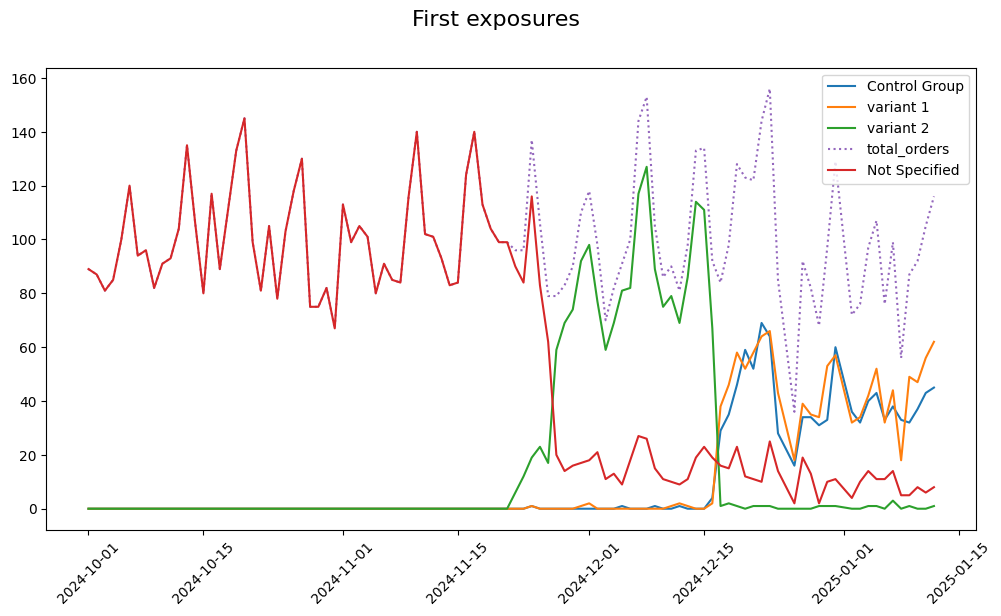

In [120]:
# =====================================
# Plots
# =====================================

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df_grouped)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['Control Group', 'variant 1', 'variant 2', 'total_orders', 'Not Specified'],
        'colors': ['blue', 'orange', 'green', 'purple','red'], # default None
        'styles': ['-', '-', '-', ':', '-'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'First exposures' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Perc of Instruction based on Default

In [278]:
# Create a new column order_id and extrenal_id concatenated
df['order_id'] = df['order_id'].astype(str)
df['external_id'] = df['external_id'].astype(str)
df['order_external_id'] = df['order_id'] + '_' + df['external_id']

# Cut dataset for dates older than 2024-12-15
df = df[df['p_creation_date'] >= '2024-11-01']

In [279]:
# Group by p_creation_date, variant and strategy
df_grouped = df.groupby(['p_creation_date', 'variant', 'strategy'])['order_external_id'].nunique().reset_index()

# I have one column that is variant, and one column tha is strategy. First I want to pivot the strategy column so for each day and variant I have the number of order_external for each strategy
df_grouped = df_grouped.pivot(index=['p_creation_date', 'variant'], columns='strategy', values='order_external_id').reset_index()
df_grouped.fillna(0, inplace=True)

# Now I want to pivot the variant column so for each day I have the number of order_external for each variant and strategy
df_grouped = df_grouped.pivot(index='p_creation_date', columns='variant').reset_index()
df_grouped.fillna(0, inplace=True)

# Delete the multiindex in columns
df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns.values]

# Rename p_creation_date_ to p_creation_date
df_grouped.rename(columns={'p_creation_date_':'p_creation_date'}, inplace=True)

# Sort by p_creation_date
df_grouped.sort_values('p_creation_date', inplace=True)

df_grouped

df_grouped['total_Control Group'] = df_grouped['REMOVE_Control Group'] + df_grouped['REPLACE_WITH_BEST_MATCH_Control Group']
df_grouped['total_variant 1'] = df_grouped['REMOVE_variant 1'] + df_grouped['REPLACE_WITH_BEST_MATCH_variant 1']
df_grouped['total_variant 2'] = df_grouped['REMOVE_variant 2'] + df_grouped['REPLACE_WITH_BEST_MATCH_variant 2']
df_grouped['total_Not Specified'] = df_grouped['REMOVE_Not Specified'] + df_grouped['REPLACE_WITH_BEST_MATCH_Not Specified']


df_grouped['perc_Control_Group_REMOVE'] = df_grouped['REMOVE_Control Group'] / df_grouped['total_Control Group']
df_grouped['perc_Control_Group_REPLACE_WITH_BEST_MATCH'] = df_grouped['REPLACE_WITH_BEST_MATCH_Control Group'] / df_grouped['total_Control Group']
df_grouped['perc_variant_1_REMOVE'] = df_grouped['REMOVE_variant 1'] / df_grouped['total_variant 1']
df_grouped['perc_variant_1_REPLACE_WITH_BEST_MATCH'] = df_grouped['REPLACE_WITH_BEST_MATCH_variant 1'] / df_grouped['total_variant 1']

df_grouped

,p_creation_date,REMOVE_Control Group,REMOVE_Not Specified,REMOVE_variant 1,REMOVE_variant 2,REPLACE_WITH_BEST_MATCH_Control Group,REPLACE_WITH_BEST_MATCH_Not Specified,REPLACE_WITH_BEST_MATCH_variant 1,REPLACE_WITH_BEST_MATCH_variant 2,total_Control Group,total_variant 1,total_variant 2,total_Not Specified,perc_Control_Group_REMOVE,perc_Control_Group_REPLACE_WITH_BEST_MATCH,perc_variant_1_REMOVE,perc_variant_1_REPLACE_WITH_BEST_MATCH
0,2024-12-13,0.0,0.0,0.0,12.0,0.0,52.0,8.0,390.0,0.0,8.0,402.0,52.0,NaN,NaN,0.000000,1.000000
1,2024-12-14,0.0,0.0,0.0,12.0,0.0,97.0,0.0,626.0,0.0,0.0,638.0,97.0,NaN,NaN,NaN,NaN
2,2024-12-15,0.0,1.0,0.0,18.0,0.0,123.0,0.0,658.0,0.0,0.0,676.0,124.0,NaN,NaN,NaN,NaN
3,2024-12-16,0.0,39.0,2.0,75.0,0.0,53.0,0.0,94.0,0.0,2.0,169.0,92.0,NaN,NaN,1.000000,0.000000
4,2024-12-17,138.0,67.0,195.0,3.0,1.0,0.0,1.0,0.0,139.0,196.0,3.0,67.0,0.992806,0.007194,0.994898,0.005102
5,2024-12-18,159.0,51.0,235.0,4.0,0.0,0.0,3.0,0.0,159.0,238.0,4.0,51.0,1.000000,0.000000,0.987395,0.012605
6,2024-12-19,166.0,117.0,267.0,4.0,1.0,0.0,1.0,0.0,167.0,268.0,4.0,117.0,0.994012,0.005988,0.996269,0.003731
7,2024-12-20,231.0,56.0,261.0,0.0,1.0,0.0,7.0,0.0,232.0,268.0,0.0,56.0,0.995690,0.004310,0.973881,0.026119
8,2024-12-21,231.0,51.0,258.0,7.0,0.0,0.0,6.0,0.0,231.0,264.0,7.0,51.0,1.000000,0.000000,0.977273,0.022727
9,2024-12-22,347.0,38.0,337.0,2.0,1.0,0.0,1.0,0.0,348.0,338.0,2.0,38.0,0.997126,0.002874,0.997041,0.002959


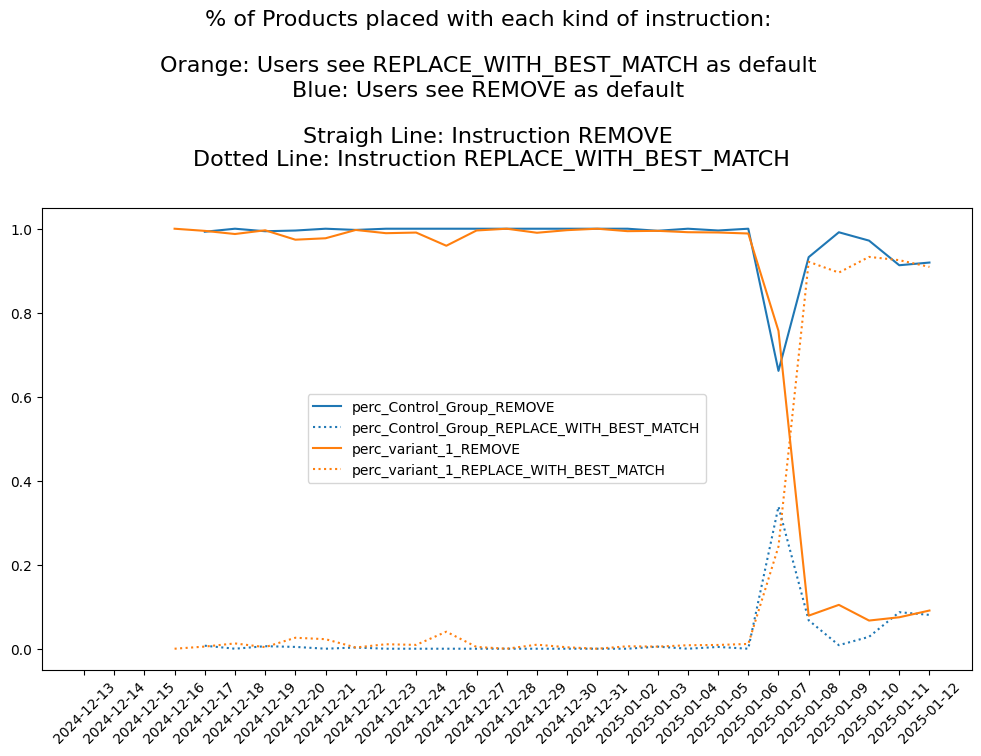

In [280]:
# =====================================
# Plots
# =====================================

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df_grouped)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['perc_Control_Group_REMOVE', 'perc_Control_Group_REPLACE_WITH_BEST_MATCH', 'perc_variant_1_REMOVE', 'perc_variant_1_REPLACE_WITH_BEST_MATCH'],
        'colors': ['blue', 'blue', 'orange', 'orange'], # default None
        'styles': ['-', ':', '-', ':'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': '% of Products placed with each kind of instruction: \n\nOrange: Users see REPLACE_WITH_BEST_MATCH as default \nBlue: Users see REMOVE as default \n\nStraigh Line: Instruction REMOVE \nDotted Line: Instruction REPLACE_WITH_BEST_MATCH' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [281]:
df_grouped

,p_creation_date,REMOVE_Control Group,REMOVE_Not Specified,REMOVE_variant 1,REMOVE_variant 2,REPLACE_WITH_BEST_MATCH_Control Group,REPLACE_WITH_BEST_MATCH_Not Specified,REPLACE_WITH_BEST_MATCH_variant 1,REPLACE_WITH_BEST_MATCH_variant 2,total_Control Group,total_variant 1,total_variant 2,total_Not Specified,perc_Control_Group_REMOVE,perc_Control_Group_REPLACE_WITH_BEST_MATCH,perc_variant_1_REMOVE,perc_variant_1_REPLACE_WITH_BEST_MATCH
0,2024-12-13,0.0,0.0,0.0,12.0,0.0,52.0,8.0,390.0,0.0,8.0,402.0,52.0,NaN,NaN,0.000000,1.000000
1,2024-12-14,0.0,0.0,0.0,12.0,0.0,97.0,0.0,626.0,0.0,0.0,638.0,97.0,NaN,NaN,NaN,NaN
2,2024-12-15,0.0,1.0,0.0,18.0,0.0,123.0,0.0,658.0,0.0,0.0,676.0,124.0,NaN,NaN,NaN,NaN
3,2024-12-16,0.0,39.0,2.0,75.0,0.0,53.0,0.0,94.0,0.0,2.0,169.0,92.0,NaN,NaN,1.000000,0.000000
4,2024-12-17,138.0,67.0,195.0,3.0,1.0,0.0,1.0,0.0,139.0,196.0,3.0,67.0,0.992806,0.007194,0.994898,0.005102
5,2024-12-18,159.0,51.0,235.0,4.0,0.0,0.0,3.0,0.0,159.0,238.0,4.0,51.0,1.000000,0.000000,0.987395,0.012605
6,2024-12-19,166.0,117.0,267.0,4.0,1.0,0.0,1.0,0.0,167.0,268.0,4.0,117.0,0.994012,0.005988,0.996269,0.003731
7,2024-12-20,231.0,56.0,261.0,0.0,1.0,0.0,7.0,0.0,232.0,268.0,0.0,56.0,0.995690,0.004310,0.973881,0.026119
8,2024-12-21,231.0,51.0,258.0,7.0,0.0,0.0,6.0,0.0,231.0,264.0,7.0,51.0,1.000000,0.000000,0.977273,0.022727
9,2024-12-22,347.0,38.0,337.0,2.0,1.0,0.0,1.0,0.0,348.0,338.0,2.0,38.0,0.997126,0.002874,0.997041,0.002959


# Perc of Instruction Replacement with Replacement

In [282]:
# Create a new column order_id and extrenal_id concatenated
df['order_id'] = df['order_id'].astype(str)
df['external_id'] = df['external_id'].astype(str)
df['order_external_id'] = df['order_id'] + '_' + df['external_id']

# Cut dataset for dates older than 2024-12-15
df = df[df['p_creation_date'] >= '2024-11-01']

In [283]:
df.head()

,p_creation_date,order_id,external_id,strategy,alternativeproducts,customer_id,store_address_id,store_name,order_subvertical3,variant,product_name,bought_product_id_is_pna_replacement,bought_product_id_is_pna_partial_removal,bought_product_id_is_pna_total_removal,bought_product_id_is_wm_feedback,bought_product_id_is_pna,order_external_id
0,2025-01-12,101140428090,603945,REPLACE_WITH_BEST_MATCH,"['588727', '9155', '9148', '9150']",91093,481369,Eataly,Groceries,variant 1,La Panetteria di Eataly Panedì Bio 1Kg,False,False,False,False,False,101140428090_603945
1,2025-01-06,101125496942,573975,REMOVE,[None],310391,481369,Eataly,Groceries,variant 1,Villani Salumi Listarelle di Guanciale 0.12Kg,False,False,False,False,False,101125496942_573975
2,2024-12-22,101093836688,16795,REMOVE,[None],1117235,481372,Eataly,Groceries,variant 1,Guerrini Riso Carnaroli 1Kg,False,False,False,False,False,101093836688_16795
3,2024-12-24,101098179953,244528,REMOVE,[None],168816258,481369,Eataly,Groceries,variant 1,L'Ortofrutta di Eataly Patate 1 KG,False,False,True,False,True,101098179953_244528
4,2025-01-05,101122536506,64705,REMOVE,[None],58897298,481369,Eataly,Groceries,Control Group,Bredy Ugo Fontina DOP 0.3Kg,False,False,True,False,True,101122536506_64705


In [284]:
# New column Any Removal if Partial or Total Removal are true
df['bought_product_id_is_pna_any_removal'] = df['bought_product_id_is_pna_partial_removal'] | df['bought_product_id_is_pna_total_removal']
df.head()

,p_creation_date,order_id,external_id,strategy,alternativeproducts,customer_id,store_address_id,store_name,order_subvertical3,variant,product_name,bought_product_id_is_pna_replacement,bought_product_id_is_pna_partial_removal,bought_product_id_is_pna_total_removal,bought_product_id_is_wm_feedback,bought_product_id_is_pna,order_external_id,bought_product_id_is_pna_any_removal
0,2025-01-12,101140428090,603945,REPLACE_WITH_BEST_MATCH,"['588727', '9155', '9148', '9150']",91093,481369,Eataly,Groceries,variant 1,La Panetteria di Eataly Panedì Bio 1Kg,False,False,False,False,False,101140428090_603945,False
1,2025-01-06,101125496942,573975,REMOVE,[None],310391,481369,Eataly,Groceries,variant 1,Villani Salumi Listarelle di Guanciale 0.12Kg,False,False,False,False,False,101125496942_573975,False
2,2024-12-22,101093836688,16795,REMOVE,[None],1117235,481372,Eataly,Groceries,variant 1,Guerrini Riso Carnaroli 1Kg,False,False,False,False,False,101093836688_16795,False
3,2024-12-24,101098179953,244528,REMOVE,[None],168816258,481369,Eataly,Groceries,variant 1,L'Ortofrutta di Eataly Patate 1 KG,False,False,True,False,True,101098179953_244528,True
4,2025-01-05,101122536506,64705,REMOVE,[None],58897298,481369,Eataly,Groceries,Control Group,Bredy Ugo Fontina DOP 0.3Kg,False,False,True,False,True,101122536506_64705,True


In [285]:
# Filter for strategy REPLACE_WITH_BEST_MATCH
df_filtered = df[df['strategy'] == 'REPLACE_WITH_BEST_MATCH']

df_grouped = df_filtered.groupby(['p_creation_date']).agg(
    total_products = ('strategy', 'count'),
    replaced_products = ('bought_product_id_is_pna_replacement', lambda x: sum(x == True)),
    any_removal_products = ('bought_product_id_is_pna_any_removal', lambda x: sum(x == True))
).reset_index()

df_grouped['perc_replaced_products'] = df_grouped['replaced_products'] / df_grouped['total_products']
df_grouped['perc_removal_saved'] = df_grouped['replaced_products'] / (df_grouped['any_removal_products'] + df_grouped['replaced_products'])
df_grouped

,p_creation_date,total_products,replaced_products,any_removal_products,perc_replaced_products,perc_removal_saved
0,2024-12-13,450,21,35,0.046667,0.375000
1,2024-12-14,723,48,66,0.066390,0.421053
2,2024-12-15,781,38,80,0.048656,0.322034
3,2024-12-16,147,5,7,0.034014,0.416667
4,2024-12-17,2,0,1,0.000000,0.000000
5,2024-12-18,3,0,0,0.000000,NaN
6,2024-12-19,2,0,0,0.000000,NaN
7,2024-12-20,8,2,0,0.250000,1.000000
8,2024-12-21,6,0,1,0.000000,0.000000
9,2024-12-22,2,0,0,0.000000,NaN


In [286]:
# Percentage of replaced products from total products
print(df_grouped['any_removal_products'].sum()/df_grouped['total_products'].sum())

0.0979446840903324


In [287]:
# Percentage of replaced products from total products
print(df_grouped['replaced_products'].sum()/df_grouped['total_products'].sum())

0.05252473991372748


In [288]:
# Any removal saved
print(df_grouped['replaced_products'].sum() / (df_grouped['replaced_products'].sum() + df_grouped['any_removal_products'].sum()))

0.3490725126475548


In [289]:
# Filter for strategy REPLACE_WITH_BEST_MATCH
df_filtered = df[df['strategy'] == 'REMOVE']

df_grouped = df_filtered.groupby(['p_creation_date']).agg(
    total_products = ('strategy', 'count'),
    replaced_products = ('bought_product_id_is_pna_replacement', lambda x: sum(x == True)),
    any_removal_products = ('bought_product_id_is_pna_any_removal', lambda x: sum(x == True))
).reset_index()

df_grouped['perc_replaced_products'] = df_grouped['replaced_products'] / df_grouped['total_products']
df_grouped

,p_creation_date,total_products,replaced_products,any_removal_products,perc_replaced_products
0,2024-12-13,12,0,3,0.000000
1,2024-12-14,12,0,0,0.000000
2,2024-12-15,19,0,3,0.000000
3,2024-12-16,116,0,19,0.000000
4,2024-12-17,403,0,44,0.000000
5,2024-12-18,449,0,27,0.000000
6,2024-12-19,554,0,65,0.000000
7,2024-12-20,548,0,69,0.000000
8,2024-12-21,547,0,53,0.000000
9,2024-12-22,724,0,84,0.000000


In [290]:
print(df_grouped['replaced_products'].sum()/df_grouped['total_products'].sum())

0.00017433751743375174


In [291]:
df[(df['bought_product_id_is_pna_replacement'] == False) & (df['strategy'] == 'REPLACE_WITH_BEST_MATCH')]

,p_creation_date,order_id,external_id,strategy,alternativeproducts,customer_id,store_address_id,store_name,order_subvertical3,variant,product_name,bought_product_id_is_pna_replacement,bought_product_id_is_pna_partial_removal,bought_product_id_is_pna_total_removal,bought_product_id_is_wm_feedback,bought_product_id_is_pna,order_external_id,bought_product_id_is_pna_any_removal
0,2025-01-12,101140428090,603945,REPLACE_WITH_BEST_MATCH,"['588727', '9155', '9148', '9150']",91093,481369,Eataly,Groceries,variant 1,La Panetteria di Eataly Panedì Bio 1Kg,False,False,False,False,False,101140428090_603945,False
6,2025-01-07,101128056495,388212,REPLACE_WITH_BEST_MATCH,"['526331', '388211', '567528', '627505']",166797628,481369,Eataly,Groceries,variant 1,Is Veg Tofu Bio 0.25Kg,False,False,False,False,False,101128056495_388212,False
7,2024-12-15,101076046229,149714,REPLACE_WITH_BEST_MATCH,"['193848', '193766', '564928', '95083']",33976688,481372,Eataly,Groceries,variant 2,Fattoria Casanova Cantucci con Pezzi di Ciocco...,False,False,False,False,False,101076046229_149714,False
12,2025-01-12,101139759919,581887,REPLACE_WITH_BEST_MATCH,"['543158', '629208', '622543']",15978272,481369,Eataly,Groceries,variant 1,Heaven Heaven Merenda 0.75L,False,False,False,False,False,101139759919_581887,False
19,2024-12-15,101076951554,155341,REPLACE_WITH_BEST_MATCH,"['155337', '168490', '104359']",11150538,481369,Eataly,Groceries,variant 2,Ars Italica Caviale Da Vinci 0.01Kg,False,False,False,False,False,101076951554_155341,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,2024-12-14,101074196233,58349,REPLACE_WITH_BEST_MATCH,"['524800', '380826', '66596', '86821']",10311115,481365,Eataly,Groceries,variant 2,Weihenstephan Weihenstephan Hefe Weiss 0.5L,False,False,False,False,False,101074196233_58349,False
15405,2024-12-13,101071226166,105620,REPLACE_WITH_BEST_MATCH,['146925'],2042384,481369,Eataly,Groceries,variant 2,L'Ortofrutta di Eataly Pomodori Datterino Sele...,False,False,False,False,False,101071226166_105620,False
15409,2025-01-09,101131563624,380094,REPLACE_WITH_BEST_MATCH,"['106511', '7945', '7900', '15436']",6202617,481365,Eataly,Groceries,variant 1,L'Ortofrutta di Eataly Avocado 0.2Kg,False,False,False,False,False,101131563624_380094,False
15410,2024-12-14,101073875929,9157,REPLACE_WITH_BEST_MATCH,"['550549', '20559', '127356', '75613']",15918405,481365,Eataly,Groceries,variant 2,La Panetteria di Eataly Baguette Biologica 0.35Kg,False,False,False,False,False,101073875929_9157,False
